In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import gaussian_kde
import numpy as np
import pandas as pd

In [40]:
df = pd.read_csv("arrets-stib.csv", delimiter=';')

xmin, xmax = df.Longitude.min(), df.Longitude.max()
ymin, ymax = df.Latitude.min(), df.Latitude.max()

N = 100
XRange, YRange = np.linspace(xmin, xmax, N), np.linspace(ymin, ymax, N)
XMat, YMat = np.meshgrid(XRange, YRange)

X, Y = map(np.ravel, [XMat, YMat])
kde = gaussian_kde([df.Longitude, df.Latitude])
kde_scalar_sigma = 4 # the smaller the bigger the are taken into account
kde.set_bandwidth(bw_method=kde.factor / kde_scalar_sigma)
Z = kde([X, Y])

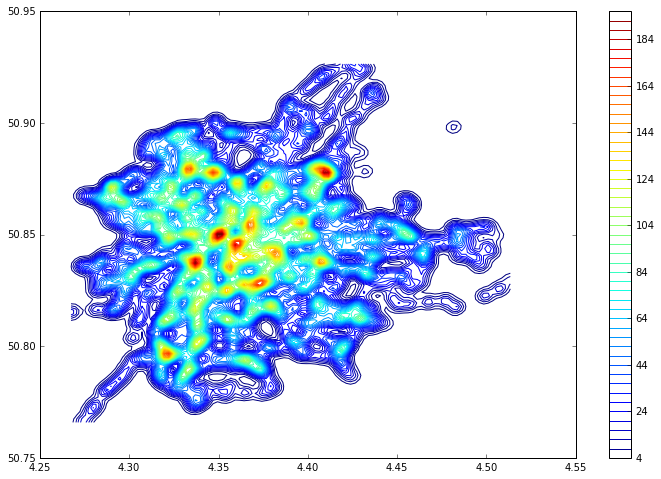

In [41]:
plt.figure(figsize=(12, 8))
plt.contour(XRange, YRange, Z.reshape(XMat.shape), 64)
plt.xlim([4.25, 4.55])
plt.ylim([50.75, 50.95])
plt.colorbar()